<a href="https://colab.research.google.com/github/saurabhraut02/ML_Mini_Project/blob/main/MiniProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ML MINI PROJECT**
# **Coronary Heart Disease Risk Prediction: A Comparative Study of Multiple Classifiers**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay


Load dataset

In [ ]:
# Load the dataset
url = '/content/framingham.csv'  # Replace with the actual URL or path
data = pd.read_csv(url)

# Display the first few rows of the dataset
data.head()


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


Step 3: Data Cleaning and Preprocessing
You may already have run this code successfully, but ensure to check and handle missing values properly:

In [ ]:
# Check for missing values
print(data.isnull().sum())

# Impute missing values for numerical columns with median and categorical with mode
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

# Create transformers for preprocessing
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute numerical data
    ('scaler', StandardScaler())  # Scale numerical data
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Impute categorical data
    ('encoder', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical data
])

# Preprocessing
preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ])

# Define the target variable and features
X = data.drop('TenYearCHD', axis=1)  # Features
y = data['TenYearCHD']  # Target variable


male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [ ]:
# Check the percentage of missing values for context
missing_percent = data.isnull().mean() * 100
print(missing_percent[missing_percent > 0])  # Only show columns with missing values

# Impute missing values
# For numerical columns, we'll use median imputation
# For categorical columns, we'll use mode imputation (most frequent value)

# Impute numerical columns with median
for col in ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']:
    data[col] = data[col].fillna(data[col].median())  # Assign the filled values back

# For categorical columns, fill them with the mode
data['education'] = data['education'].fillna(data['education'].mode()[0])  # Assign the filled values back

# Check again for missing values
print(data.isnull().sum())


education     2.476415
cigsPerDay    0.683962
BPMeds        1.250000
totChol       1.179245
BMI           0.448113
heartRate     0.023585
glucose       9.150943
dtype: float64
male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


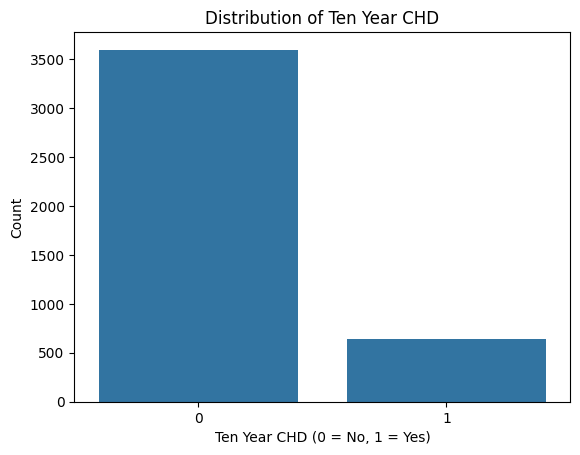

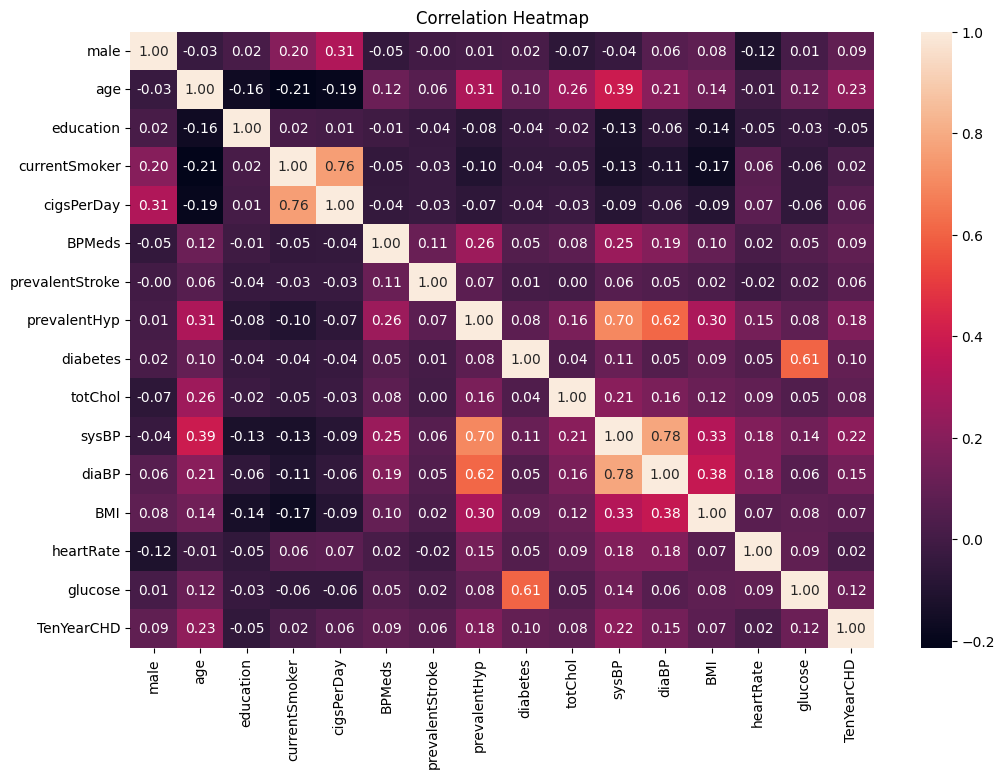

In [ ]:
# Plot the distribution of the target variable
sns.countplot(x='TenYearCHD', data=data)
plt.title('Distribution of Ten Year CHD')
plt.xlabel('Ten Year CHD (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


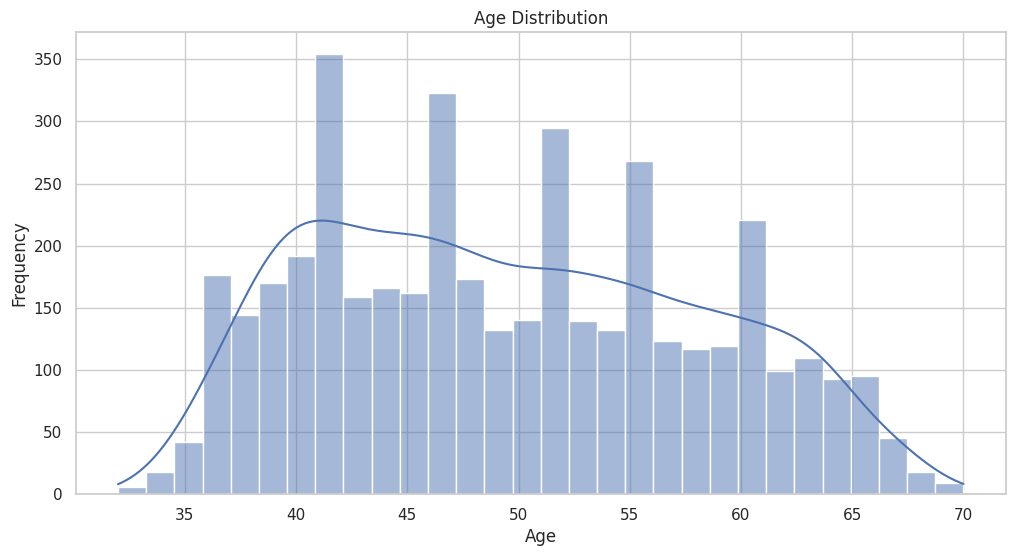

In [ ]:
# Set the style
sns.set(style="whitegrid")

# Plotting distributions of features
plt.figure(figsize=(12, 6))
sns.histplot(data['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


Feature selection

TenYearCHD         1.000000
age                0.225408
sysBP              0.216374
prevalentHyp       0.177458
diaBP              0.145112
glucose            0.121319
diabetes           0.097344
male               0.088374
BPMeds             0.086448
totChol            0.081749
BMI                0.074326
prevalentStroke    0.061823
cigsPerDay         0.058729
heartRate          0.022851
currentSmoker      0.019448
education         -0.053570
Name: TenYearCHD, dtype: float64


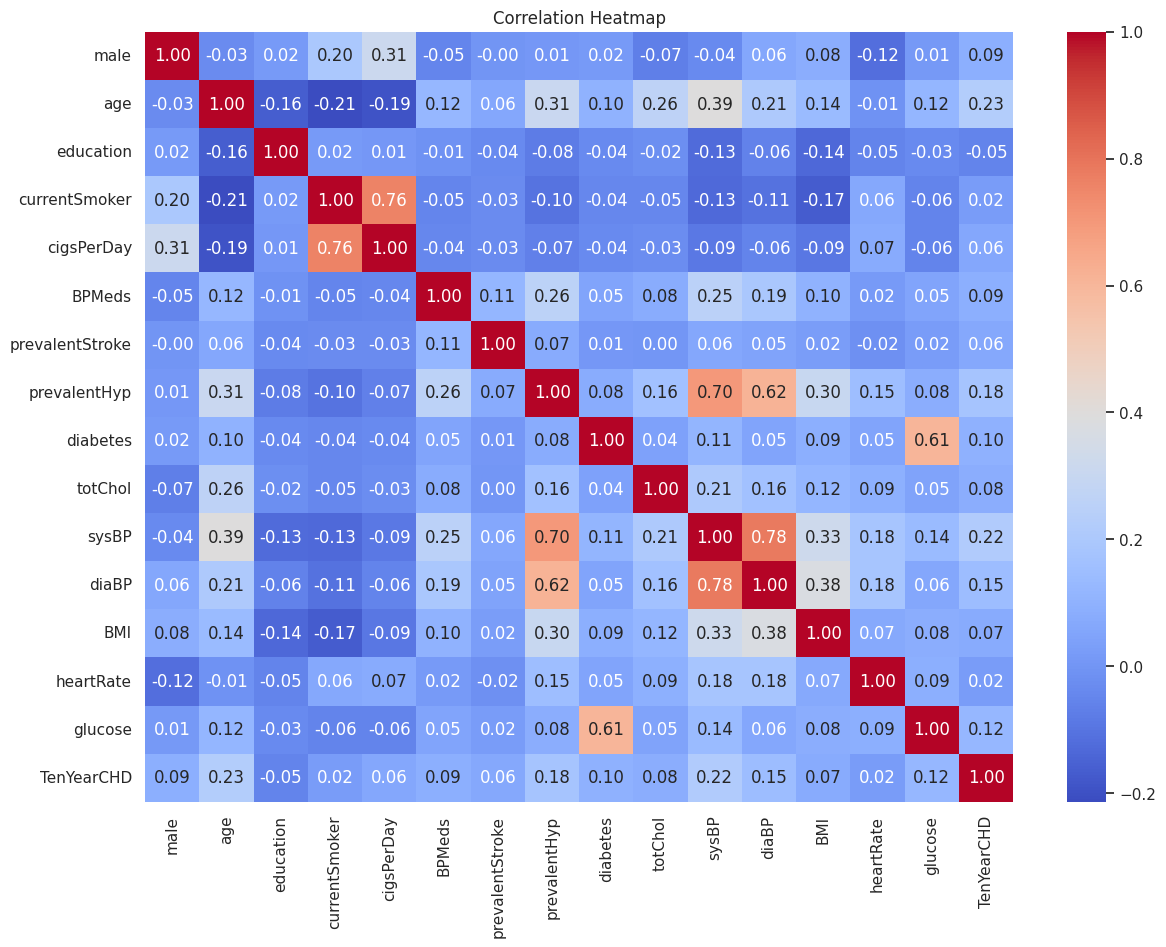

In [ ]:
# Calculate the correlation matrix
corr = data.corr()

# Display the correlation with the target variable
target_corr = corr['TenYearCHD'].sort_values(ascending=False)
print(target_corr)

# Visualize the correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
# Install statsmodels if it's not already installed
!pip install statsmodels

# Now, import the necessary library
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Assuming 'data' is your DataFrame
# Calculate VIF for each feature
X = data.drop('TenYearCHD', axis=1)  # Exclude the target variable
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display VIF values
print(vif_data)


            Feature         VIF
0              male    2.087083
1               age   40.874359
2         education    4.749315
3     currentSmoker    4.737464
4        cigsPerDay    4.024558
5            BPMeds    1.131057
6   prevalentStroke    1.025007
7      prevalentHyp    2.386728
8          diabetes    1.569102
9           totChol   31.476238
10            sysBP  137.661090
11            diaBP  135.855034
12              BMI   45.039972
13        heartRate   38.723681
14          glucose   20.882446


Selected Features:
   male  age  cigsPerDay  currentSmoker  prevalentHyp  diabetes    BMI  \
0     1   39         0.0              0             0         0  26.97   
1     0   46         0.0              0             0         0  28.73   
2     1   48        20.0              1             0         0  25.34   
3     0   61        30.0              1             1         0  28.58   
4     0   46        23.0              1             0         0  23.10   

   heartRate  sysBP  totChol  
0       80.0  106.0    195.0  
1       95.0  121.0    250.0  
2       75.0  127.5    245.0  
3       65.0  150.0    225.0  
4       85.0  130.0    285.0  
Correlations with TenYearCHD:
male             0.088374
age              0.225408
cigsPerDay       0.058729
currentSmoker    0.019448
prevalentHyp     0.177458
diabetes         0.097344
BMI              0.074326
heartRate        0.022851
sysBP            0.216374
totChol          0.081749
Name: TenYearCHD, dtype: float64


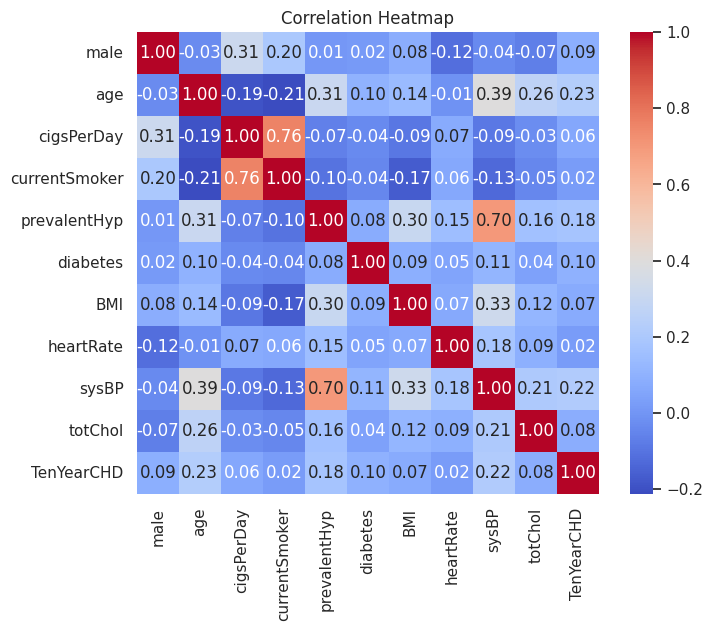

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame with the relevant features and target
features_to_keep = [
    'male',
    'age',
    'cigsPerDay',
    'currentSmoker',
    'prevalentHyp',
    'diabetes',
    'BMI',
    'heartRate',
    'sysBP',
    'totChol'
]

# Create the features and target datasets
X = data[features_to_keep]
y = data['TenYearCHD']

# Combine X and y to compute correlations
combined_data = pd.concat([X, y], axis=1)

# Calculate the correlation matrix
corr = combined_data.corr()

# Display the selected features
print("Selected Features:")
print(X.head())

# Display correlations with the target variable 'TenYearCHD'
correlations_with_target = corr['TenYearCHD'].drop('TenYearCHD')
print("Correlations with TenYearCHD:")
print(correlations_with_target)

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()


Step 6: Train-Test Split

**Logistic** regression model

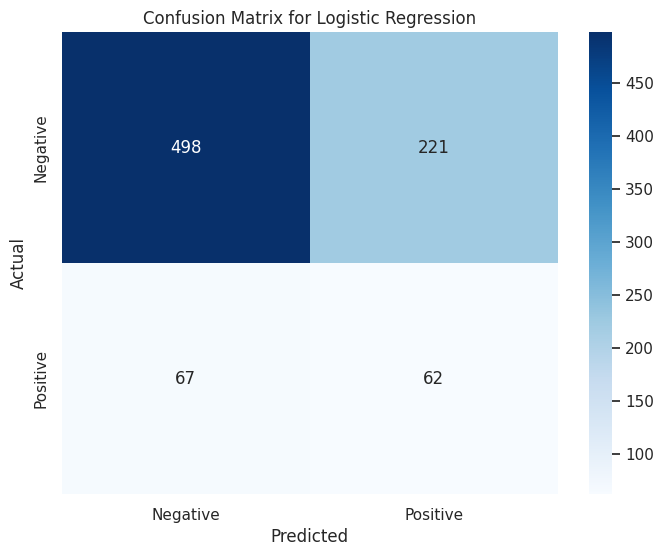

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.69      0.78       719
           1       0.22      0.48      0.30       129

    accuracy                           0.66       848
   macro avg       0.55      0.59      0.54       848
weighted avg       0.78      0.66      0.70       848



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Assuming X and y are your features and target variable
# For example:
# X = df[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'BMI', 'heartRate']]
# y = df['target_variable']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE for handling class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Create a logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model on the training data
log_reg.fit(X_train_scaled, y_train_resampled)

# Make predictions on the test set
y_pred_log = log_reg.predict(X_test_scaled)

# Confusion matrix
cm_log = confusion_matrix(y_test, y_pred_log)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_log, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("Classification Report for Logistic Regression:")
print(classification_report(y_test, y_pred_log))


Random forest

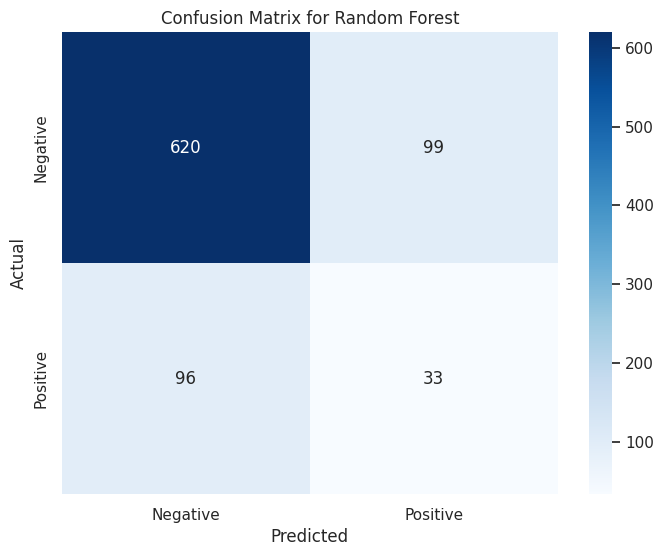

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       719
           1       0.25      0.26      0.25       129

    accuracy                           0.77       848
   macro avg       0.56      0.56      0.56       848
weighted avg       0.77      0.77      0.77       848



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Assuming X and y are your features and target variable
# For example:
# X = df[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'BMI', 'heartRate']]
# y = df['target_variable']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE for handling class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the model on the training data
rf_classifier.fit(X_train_scaled, y_train_resampled)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test_scaled)

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("Classification Report for Random Forest:")
print(classification_report(y_test, y_pred_rf))


Gradient boostiong  model

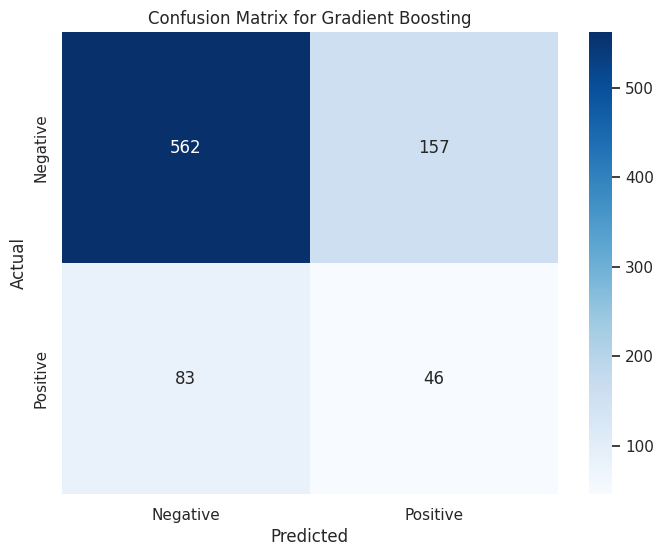

Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       719
           1       0.23      0.36      0.28       129

    accuracy                           0.72       848
   macro avg       0.55      0.57      0.55       848
weighted avg       0.77      0.72      0.74       848



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Assuming X and y are your features and target variable
# For example:
# X = df[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'BMI', 'heartRate']]
# y = df['target_variable']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE for handling class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Create a Gradient Boosting classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the model on the training data
gb_classifier.fit(X_train_scaled, y_train_resampled)

# Make predictions on the test set
y_pred_gb = gb_classifier.predict(X_test_scaled)

# Confusion matrix
cm_gb = confusion_matrix(y_test, y_pred_gb)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Gradient Boosting')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("Classification Report for Gradient Boosting:")
print(classification_report(y_test, y_pred_gb))


Model comparison


Logistic Regression Confusion Matrix:


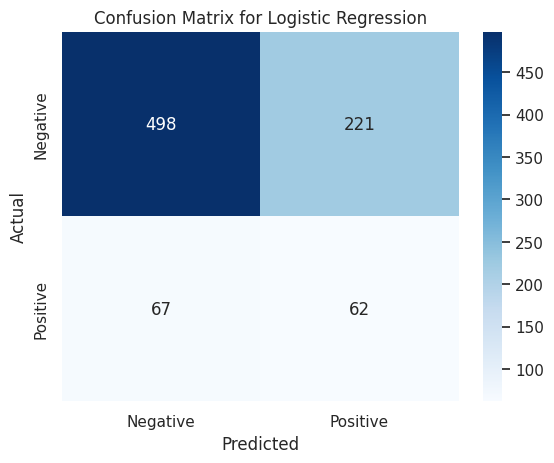


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.88      0.69      0.78       719
           1       0.22      0.48      0.30       129

    accuracy                           0.66       848
   macro avg       0.55      0.59      0.54       848
weighted avg       0.78      0.66      0.70       848


Random Forest Confusion Matrix:


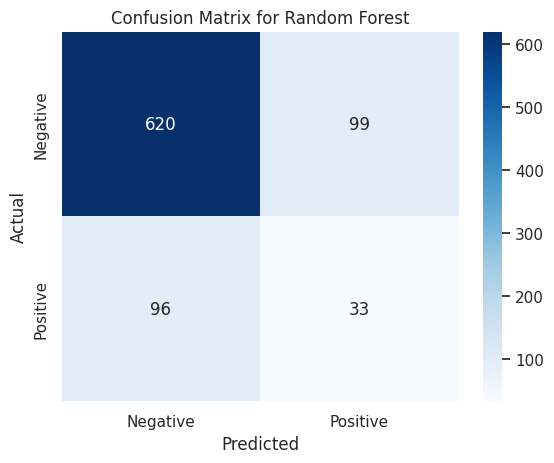


Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       719
           1       0.25      0.26      0.25       129

    accuracy                           0.77       848
   macro avg       0.56      0.56      0.56       848
weighted avg       0.77      0.77      0.77       848


Gradient Boosting Confusion Matrix:


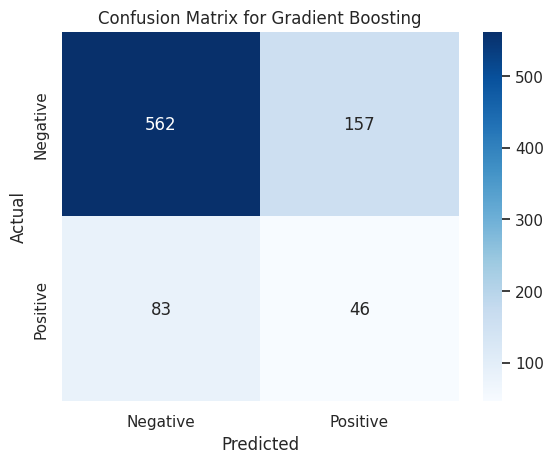


Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.87      0.78      0.82       719
           1       0.23      0.36      0.28       129

    accuracy                           0.72       848
   macro avg       0.55      0.57      0.55       848
weighted avg       0.77      0.72      0.74       848


Model Performance Comparison:
                 Model  Mean CV F1 Score  Accuracy  Precision    Recall  \
0  Logistic Regression          0.671535  0.660377   0.219081  0.480620   
1        Random Forest          0.875142  0.770047   0.250000  0.255814   
2    Gradient Boosting          0.765479  0.716981   0.226601  0.356589   

   F1 Score  
0  0.300971  
1  0.252874  
2  0.277108  

Best Model Based on Mean CV F1 Score:
Model               Random Forest
Mean CV F1 Score         0.875142
Accuracy                 0.770047
Precision                    0.25
Recall                   0.255814
F1 Score                 0.252

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Assuming X and y are your features and target variable
# For example:
# X = df[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'BMI', 'heartRate']]
# y = df['target_variable']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE for handling class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Define the models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}

# Initialize a list to store the metrics
metrics_list = []

# Loop through each model, perform cross-validation, and record metrics
for model_name, model in models.items():
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train_resampled, cv=5, scoring='f1')
    mean_cv_score = np.mean(cv_scores)

    # Train the model on the whole resampled training set
    model.fit(X_train_scaled, y_train_resampled)

    # Make predictions on the test set
    y_pred = model.predict(X_test_scaled)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Append the results to the list
    metrics_list.append({
        "Model": model_name,
        "Mean CV F1 Score": mean_cv_score,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1
    })

    # Print confusion matrix and classification report for each model
    print(f"\n{model_name} Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_test, y_pred))

# Convert the list to a DataFrame
metrics_df = pd.DataFrame(metrics_list)

# Display the performance comparison
print("\nModel Performance Comparison:")
print(metrics_df)

# Find and print the best model based on Mean CV F1 Score
best_model = metrics_df.loc[metrics_df['Mean CV F1 Score'].idxmax()]
print("\nBest Model Based on Mean CV F1 Score:")
print(best_model)


Hyper parameter tuning

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


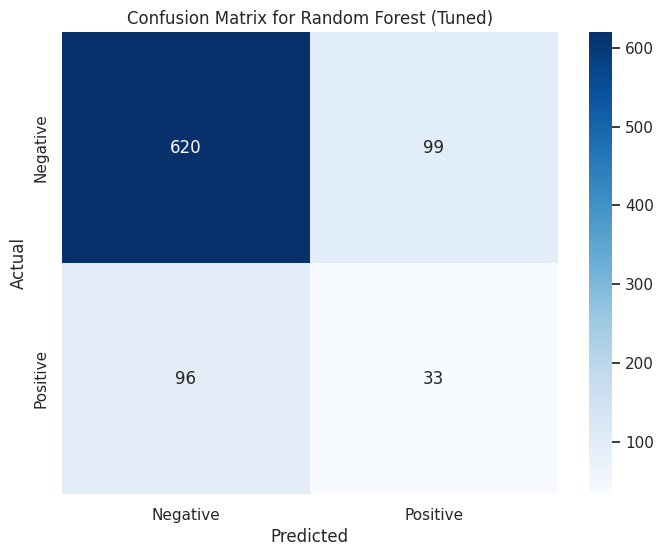

Classification Report for Random Forest (Tuned):
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       719
           1       0.25      0.26      0.25       129

    accuracy                           0.77       848
   macro avg       0.56      0.56      0.56       848
weighted avg       0.77      0.77      0.77       848



In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

# Assuming X and y are your features and target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE for handling class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]  # Corrected max_features
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='f1', verbose=2, n_jobs=-1)
grid_search.fit(X_train_scaled, y_train_resampled)

# Best parameters from grid search
print("Best parameters:", grid_search.best_params_)

# Train the model with the best parameters
best_rf_classifier = grid_search.best_estimator_

# Make predictions on the test set
y_pred_rf = best_rf_classifier.predict(X_test_scaled)

# Confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix for Random Forest (Tuned)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("Classification Report for Random Forest (Tuned):")
print(classification_report(y_test, y_pred_rf))
